In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#import data
data = pd.read_csv(r"C:\Users\91916\Downloads\Thecleverprogrammer.csv\Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [3]:
#converting date ti datetime data type
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


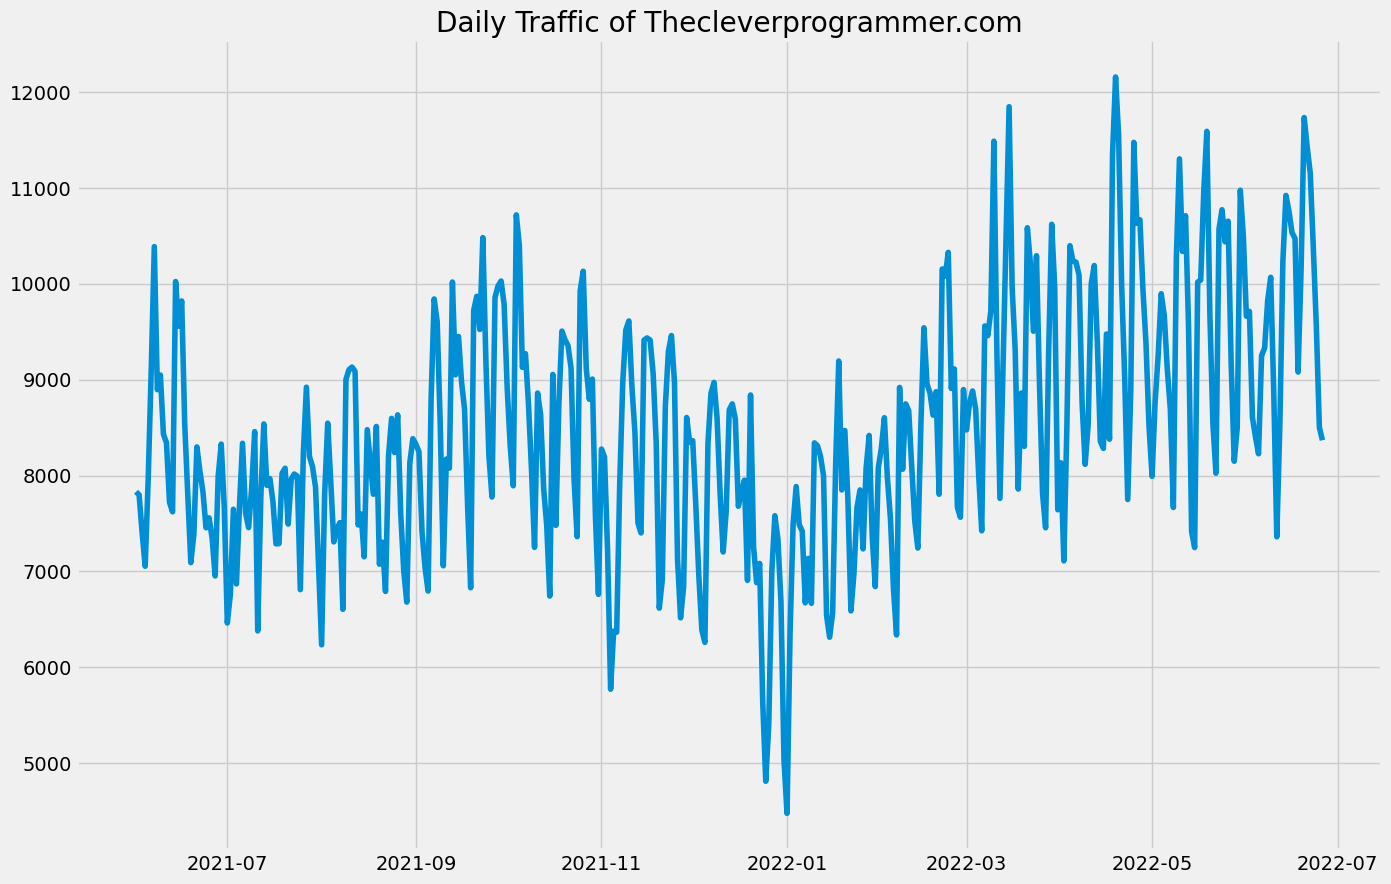

In [5]:
#plotting daily traffic
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

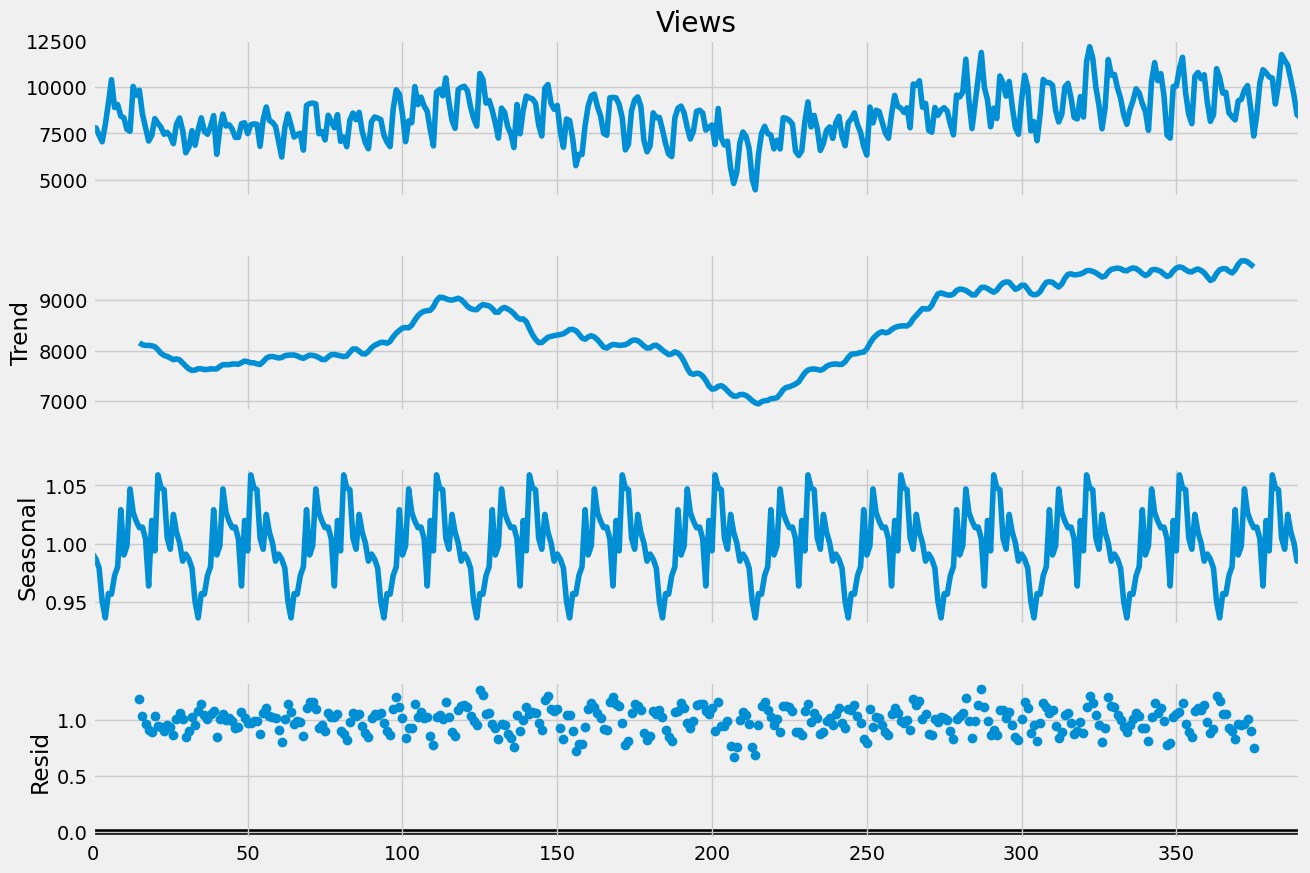

In [11]:
#Time Series Characteristics
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

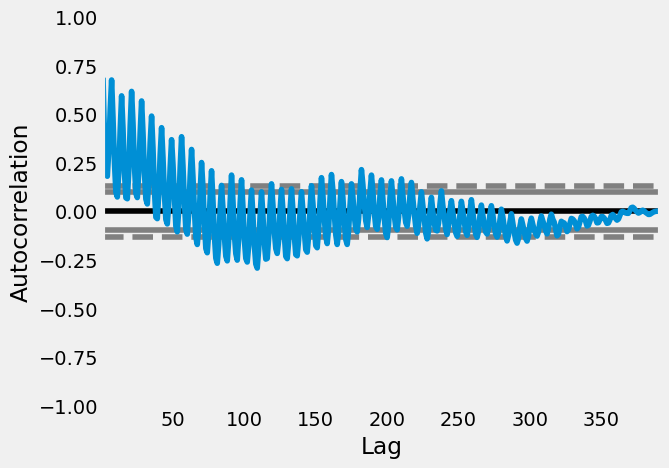

In [13]:
#plotting the autocorrelation
pd.plotting.autocorrelation_plot(data["Views"])

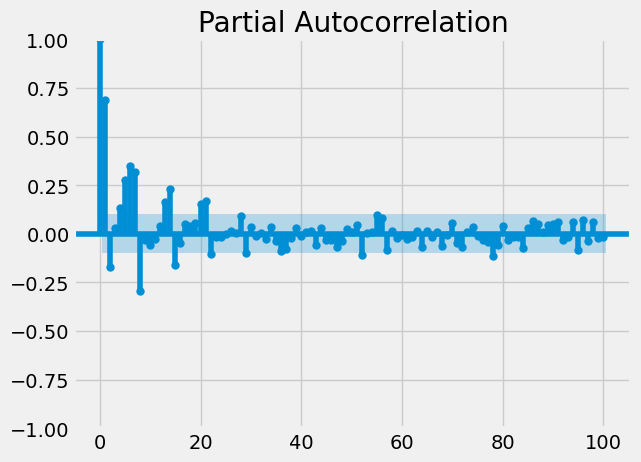

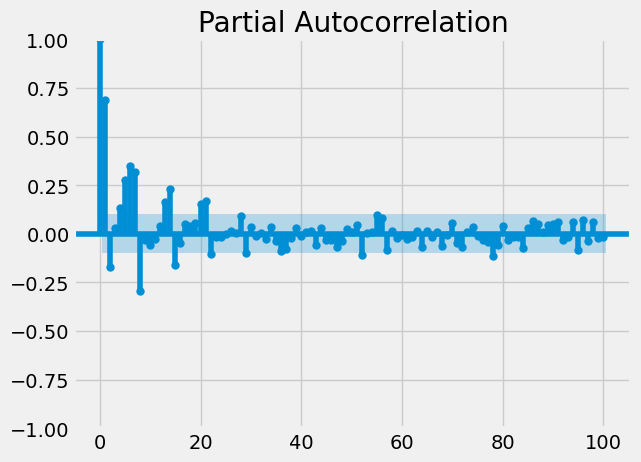

In [15]:
#Partial Autocorrelation
plot_pacf(data["Views"], lags = 100)

In [17]:
#Training SARIMA model
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\91916\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91916\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.446
Date:                            Sat, 28 Sep 2024   AIC                           6228.891
Time:                                    15:13:43   BIC                           6287.915
Sample:                                         0   HQIC                          6252.317
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7623      0.132      5.770      0.000       0.503       1.021
ar.L2         -0.7587      0.134   

In [19]:
#Forecasting traffic for 50 days

predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9869.595877
392    10787.477525
393    10773.699135
394     9857.812251
395     8747.707984
396     8210.025299
397     8931.739115
398     9700.078470
399    10285.598367
400    10637.545504
401     9871.030358
402     9339.391637
403     9003.908635
404     9078.625522
405    10541.357216
406    11011.624725
407    10920.661624
408    10105.007480
409     9432.183720
410     8614.342876
411     9176.863009
412    10387.746279
413    10620.248265
414    10791.991833
415    10245.452172
416     9424.733828
417     9005.609435
418     9146.250072
419     9894.875269
420    10256.086880
421    10735.087816
422     9901.583276
423     9503.997492
424     9018.906259
425     8824.729805
426    10144.640646
427    10860.434061
428    10919.379721
429    10404.402468
430     9423.245748
431     8681.160382
432     8736.303722
433    10080.297246
434    10538.308610
435    10854.263875
436    10466.752442
437     9312.171027
438     9139.255291
439     9346.688282
440    10305.664022


<Axes: >

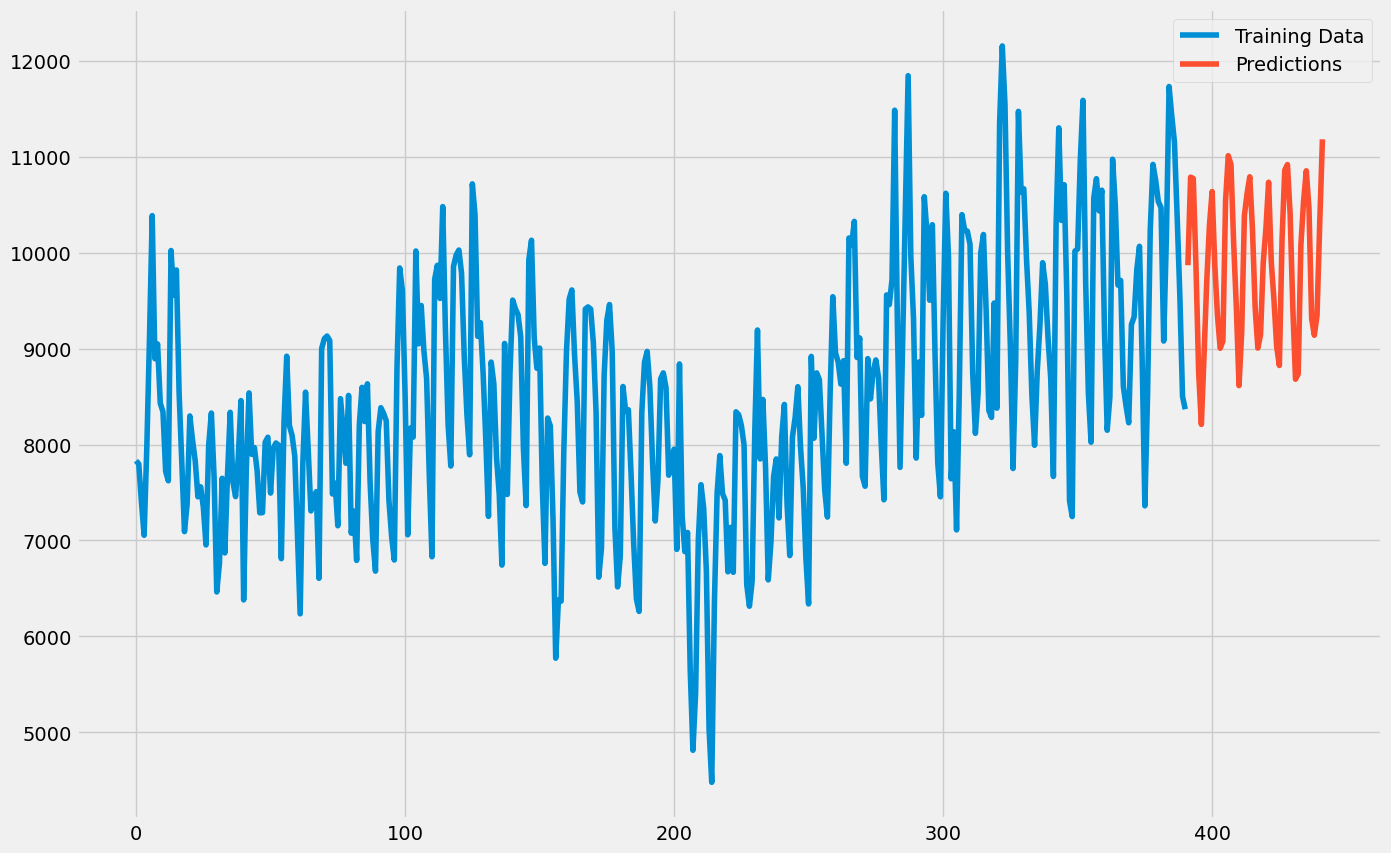

In [21]:
#Plotting the Predictions
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")